In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded = files.upload()
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Saving test.csv to test.csv
Saving train.csv to train.csv
Saving sample_submission.csv to sample_submission.csv


In [13]:
df = pd.read_csv('train.csv')
df

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980
1,1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946
2,2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576
3,3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336
4,4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500
...,...,...,...,...,...,...,...,...,...,...
37132,37132,3.3438,50.0,4.936508,1.079365,1775.0,3.022222,34.19,-118.36,1.856
37133,37133,3.7308,26.0,5.087533,0.966019,1006.0,4.316901,37.32,-121.86,1.588
37134,37134,4.1716,52.0,4.678862,1.101485,1156.0,1.431734,37.75,-122.44,3.387
37135,37135,2.7143,16.0,5.710074,1.068376,584.0,2.803659,38.40,-120.98,1.592


In [16]:
shape = df.shape
print('Размерность данных:', shape)

Размерность данных: (37137, 10)


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37137 entries, 0 to 37136
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           37137 non-null  int64  
 1   MedInc       37137 non-null  float64
 2   HouseAge     37137 non-null  float64
 3   AveRooms     37137 non-null  float64
 4   AveBedrms    37137 non-null  float64
 5   Population   37137 non-null  float64
 6   AveOccup     37137 non-null  float64
 7   Latitude     37137 non-null  float64
 8   Longitude    37137 non-null  float64
 9   MedHouseVal  37137 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 2.8 MB


исследование на пропуски

In [18]:
df.isna().sum()

id             0
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

корреляции

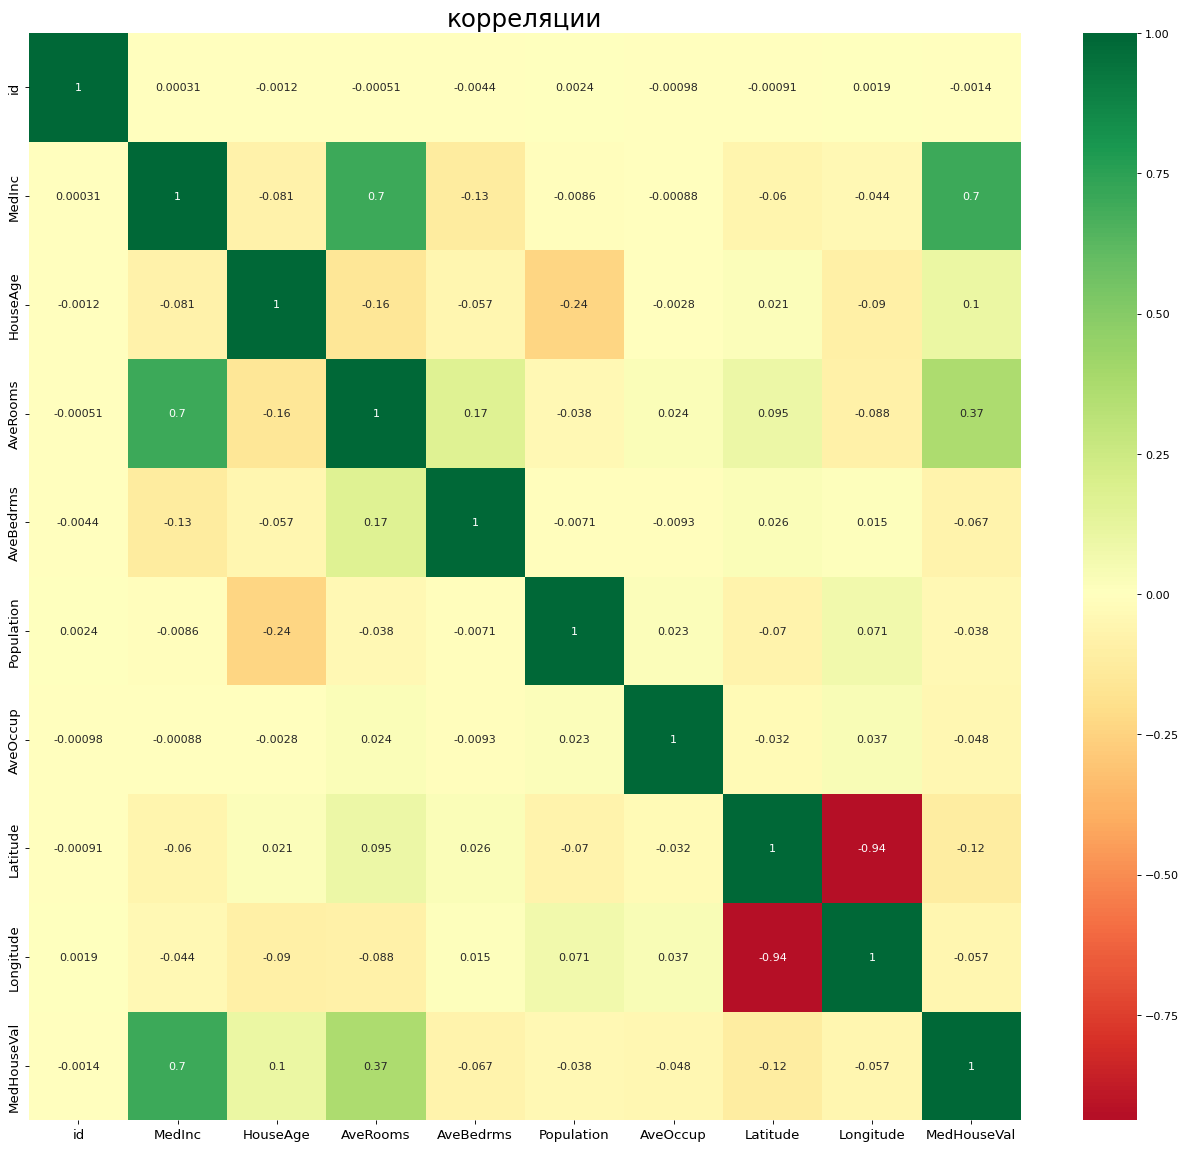

In [25]:
plt.figure(figsize=(20,18), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True) 
plt.title(label='корреляции', fontsize=22) 
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12) 
plt.show()

Исследование на повторяющиеся значения

In [36]:
for column in df.columns:
    if column == 'id': continue
    uniqueCount = len(np.unique(df.loc[:,column]))
    print(column,':', uniqueCount)

MedInc : 12310
HouseAge : 51
AveRooms : 22069
AveBedrms : 14066
Population : 3694
AveOccup : 21078
Latitude : 791
Longitude : 755
MedHouseVal : 3723


Модель линейной регрессии

In [62]:
y = df['MedInc']
x = df.drop(columns = ["id",	"MedInc",	"HouseAge", "AveBedrms",	"Population",	"AveOccup",	"Latitude", "Longitude",	"MedHouseVal"])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

print(x_train)
print(y_train)

       AveRooms
18174  6.754414
31530  6.178571
21157  5.218241
25273  4.486486
34761  8.344444
...         ...
29224  6.735363
4703   4.714908
32234  5.315638
8274   4.144703
21069  3.600264

[25995 rows x 1 columns]
18174     5.6306
31530     5.4171
21157     3.8103
25273     2.4844
34761    15.0001
          ...   
29224     5.5427
4703      2.4444
32234     2.7596
8274      3.5045
21069     2.6964
Name: MedInc, Length: 25995, dtype: float64


In [63]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [64]:
w0 = model.intercept_
print('w0:', w0)
w1 = model.coef_
print('коэффициенты (w1):', w1)

w0: -1.497324762779828
коэффициенты (w1): [1.03601018]


Уравнение линейной регрессии

In [65]:
equation = 'y = '
for i in range(len(w1)):
  equation += f'{w1[i]} * x{i + 1} + '
equation += f'{w0}'
equation

'y = 1.0360101817008212 * x0 + -1.497324762779828'

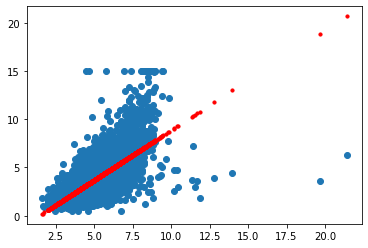

In [66]:
y_pred = model.predict(x_test)
for column in x_test.columns:
  plt.scatter(x_test[column], y_test)
  plt.scatter(x_test[column], y_pred, color='red', s=10)
  plt.show()
     

In [67]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))
     

Mean Absolute Error: 0.9307630661463694
Mean Squared Error: 1.6534452143753273
R2 score: 0.4927415339906538
